In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime

ODE solved.


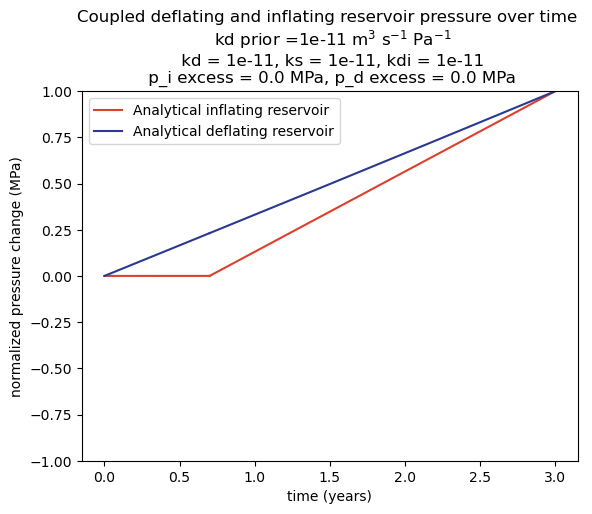

ODE solved.


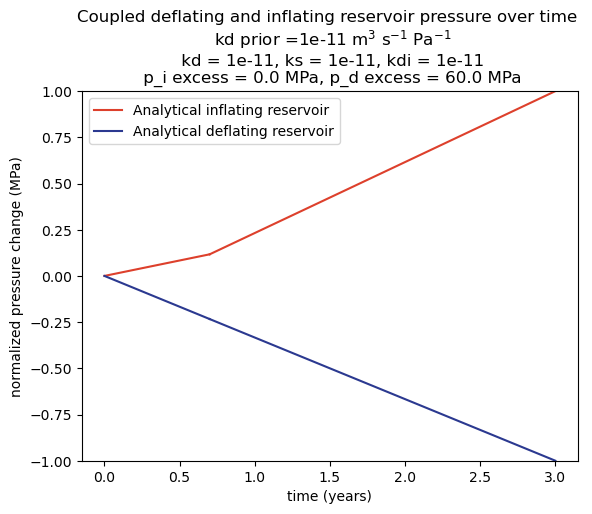

ODE solved.


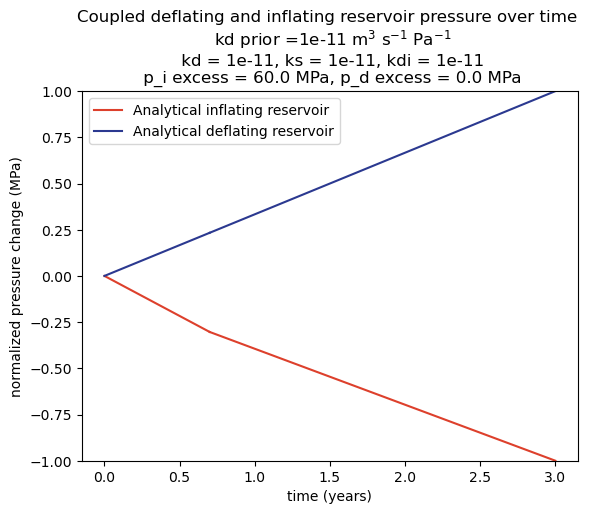

ODE solved.


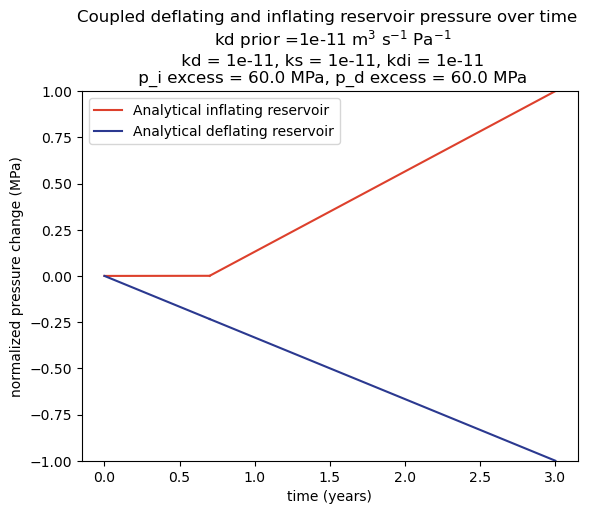

ODE solved.


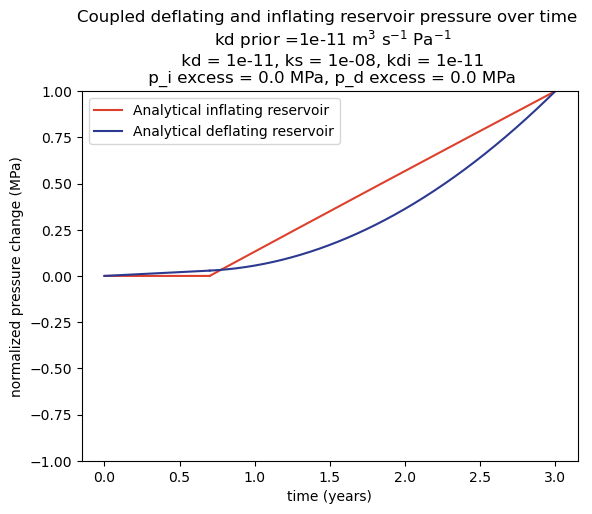

ODE solved.


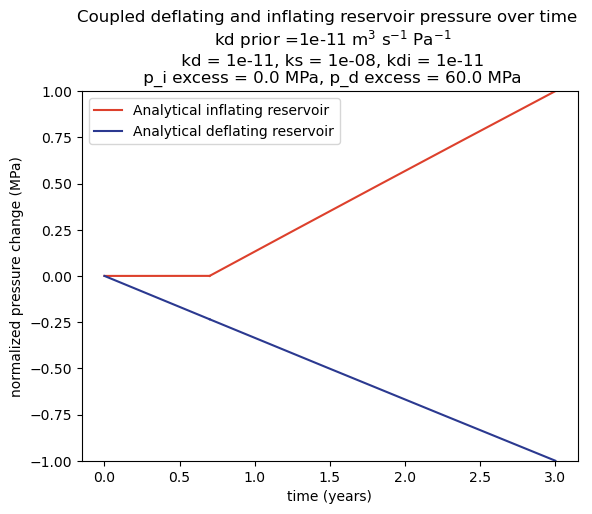

ODE solved.


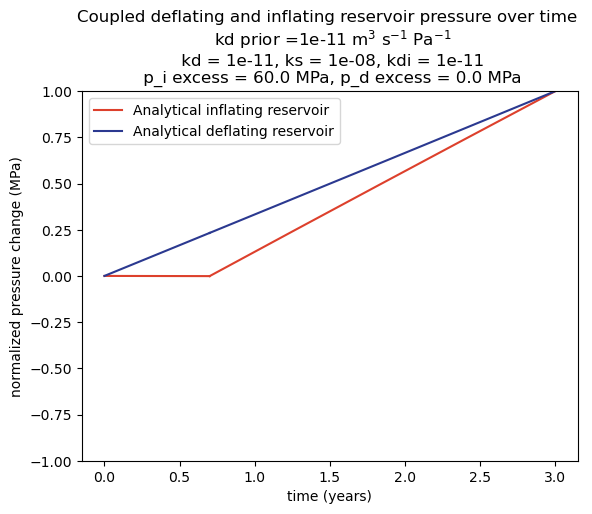

ODE solved.


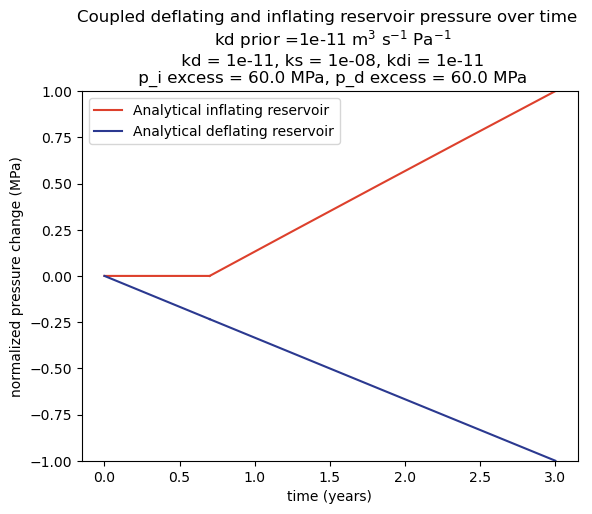

ODE solved.


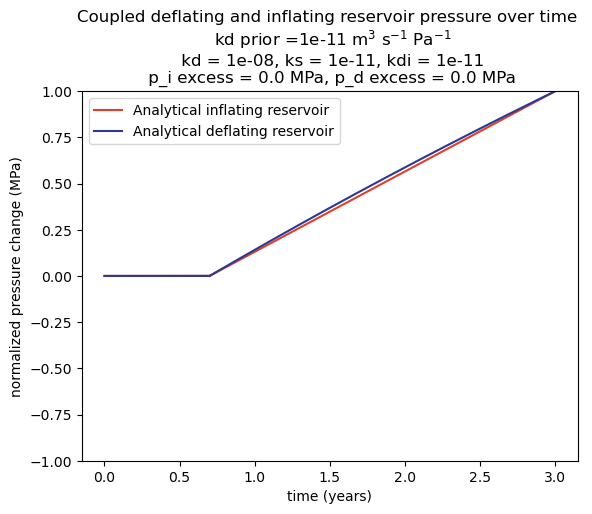

ODE solved.


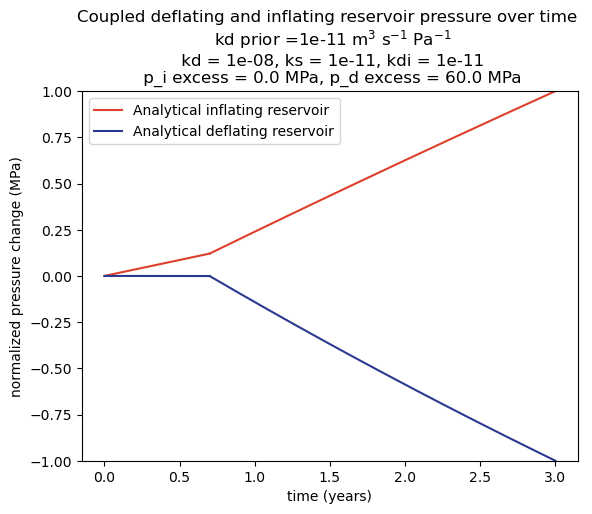

ODE solved.


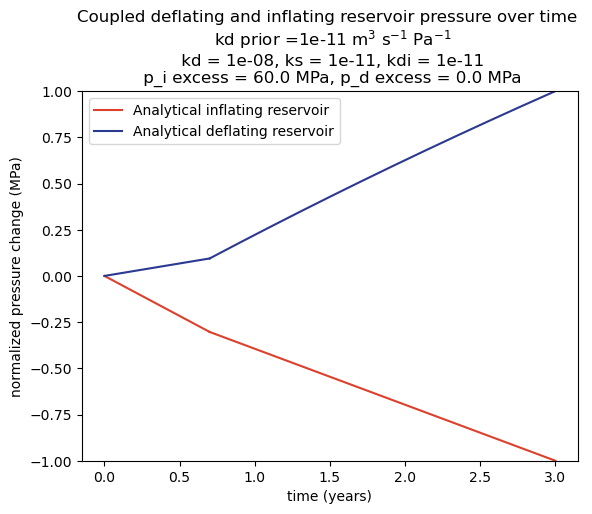

ODE solved.


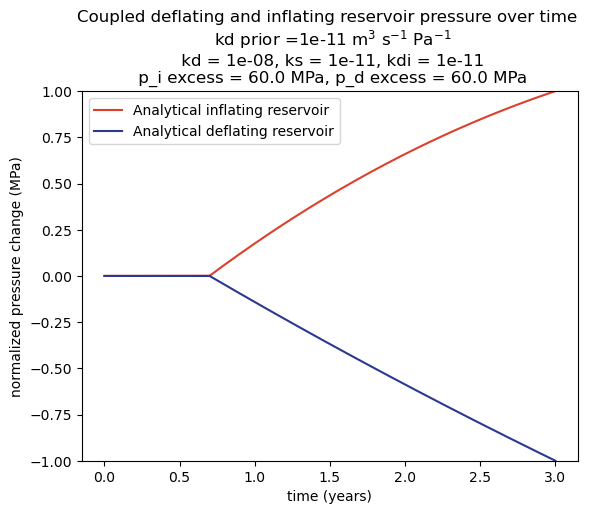

ODE solved.


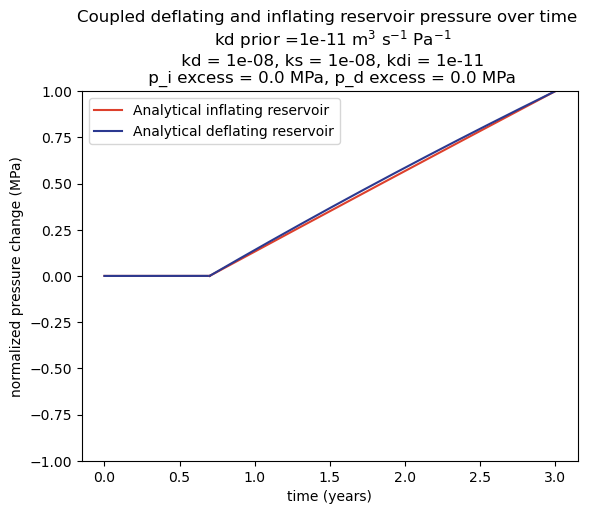

ODE solved.


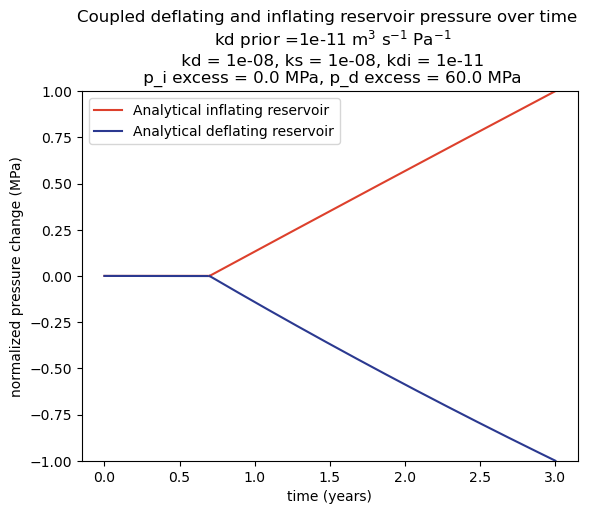

ODE solved.


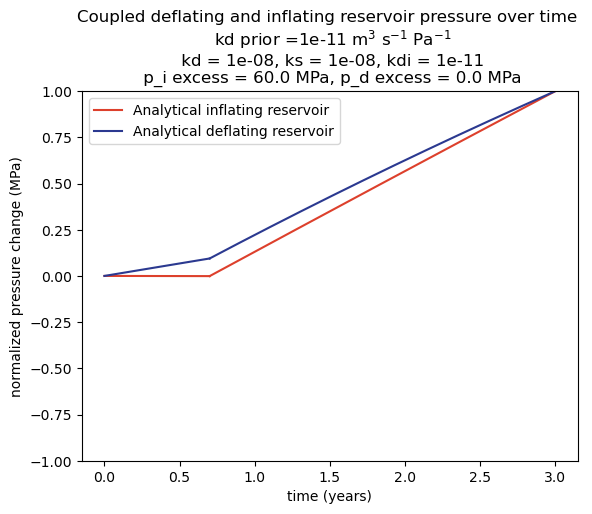

ODE solved.


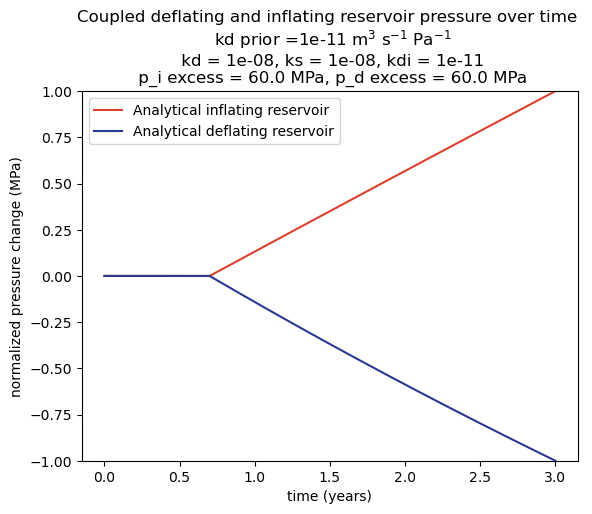

ODE solved.


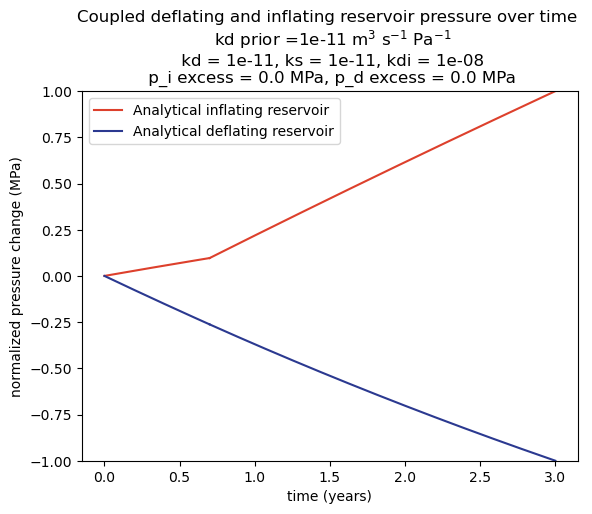

ODE solved.


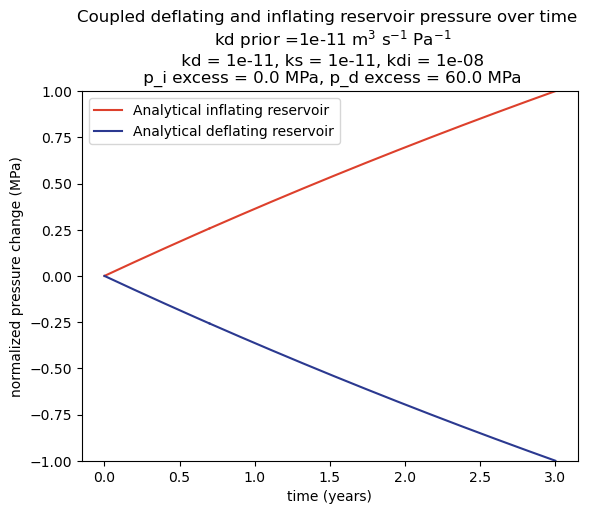

ODE solved.


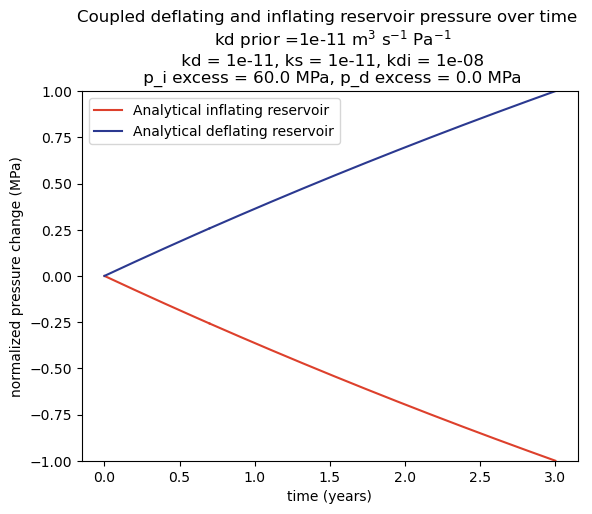

ODE solved.


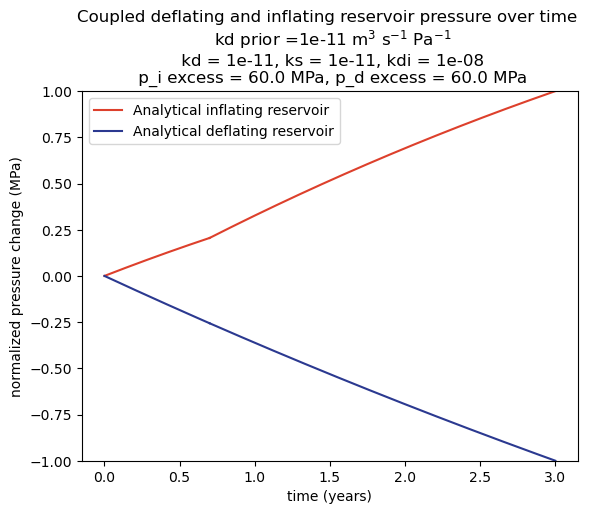

ODE solved.


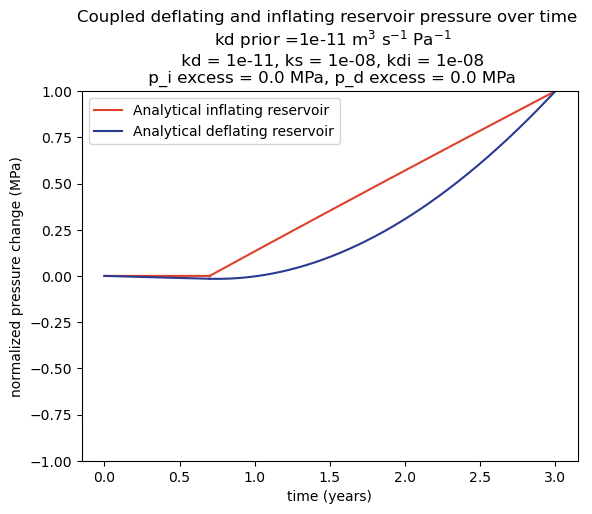

ODE solved.


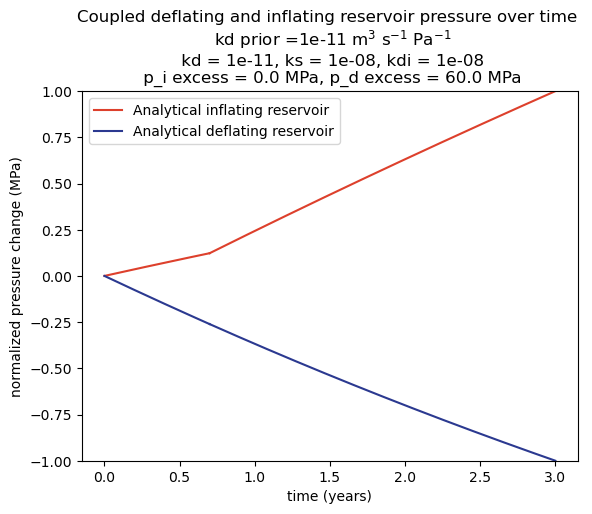

ODE solved.


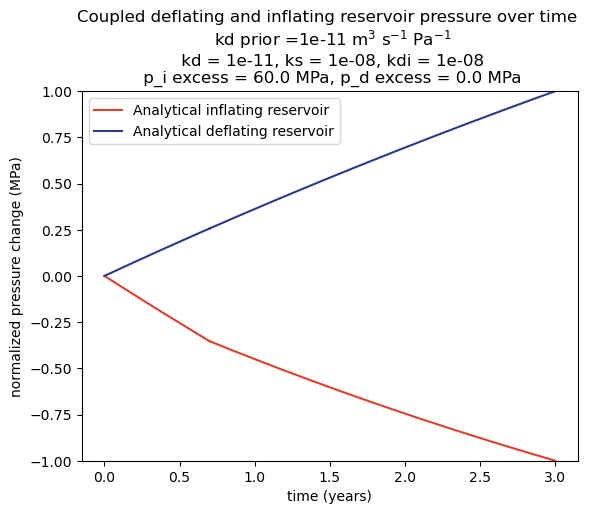

ODE solved.


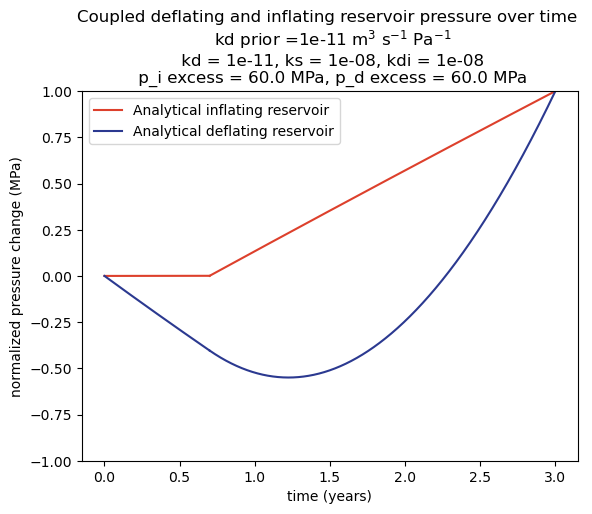

ODE solved.


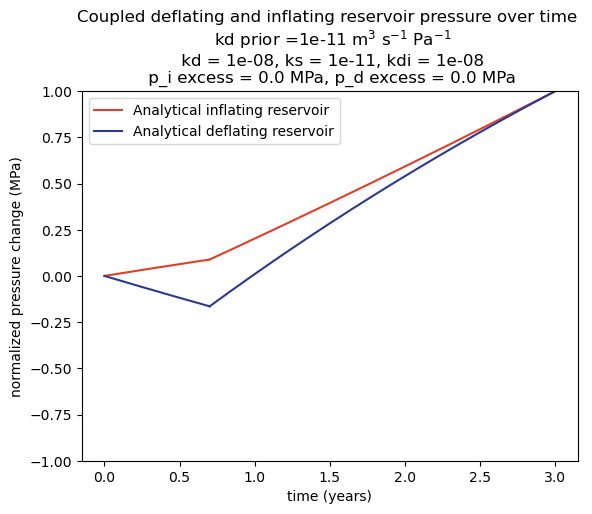

ODE solved.


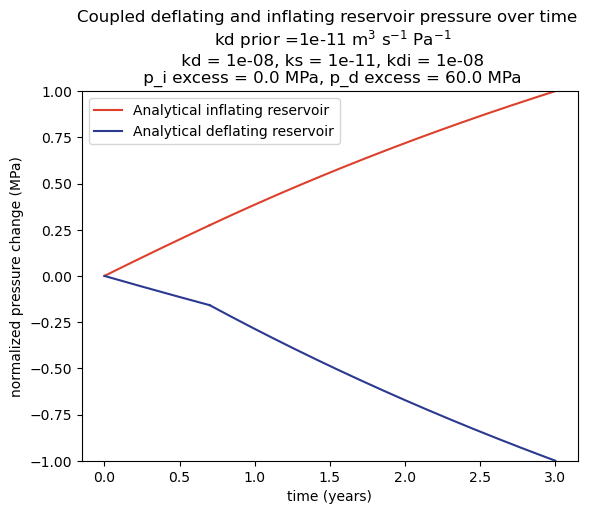

ODE solved.


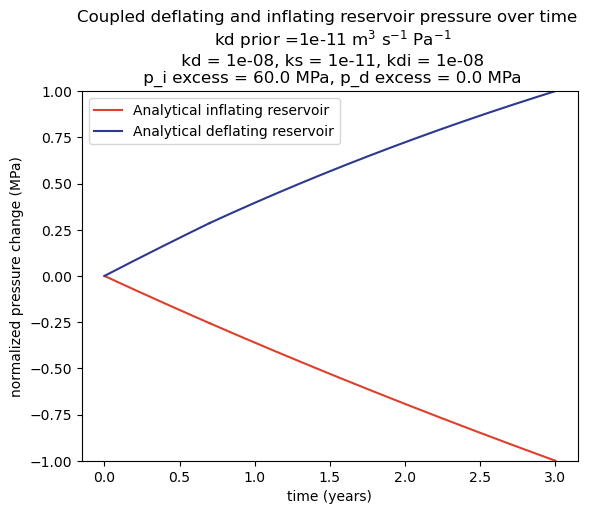

ODE solved.


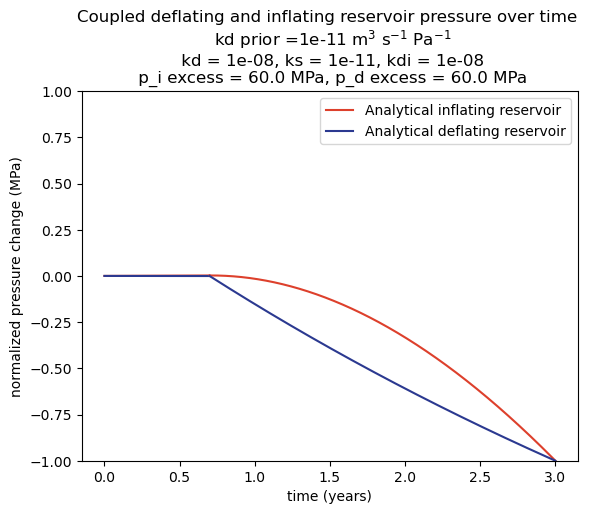

ODE solved.


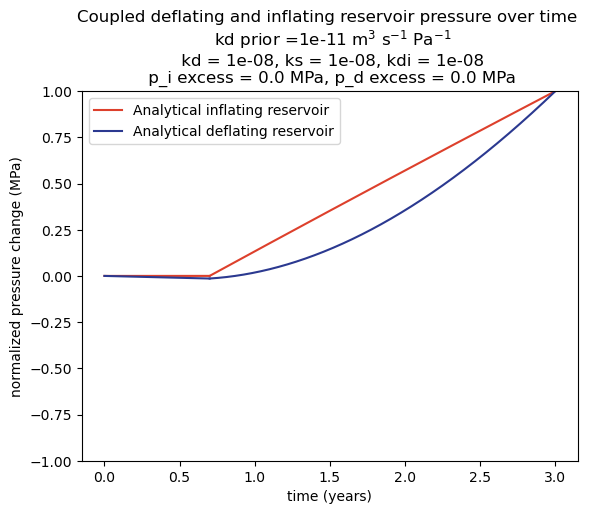

ODE solved.


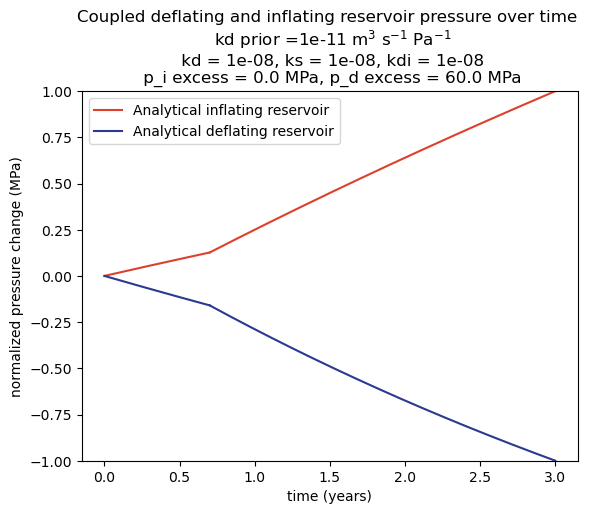

ODE solved.


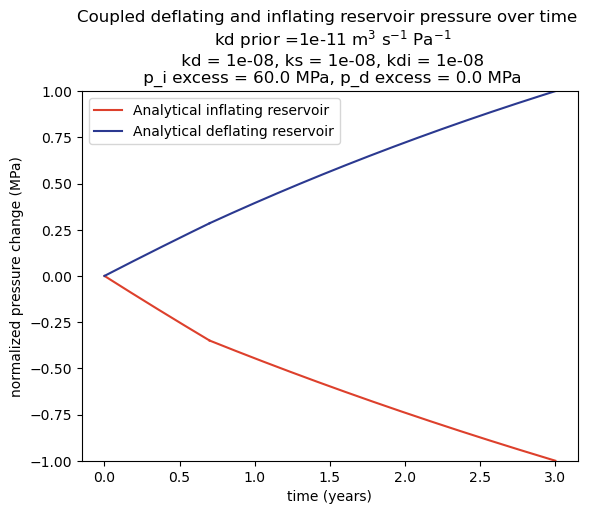

ODE solved.


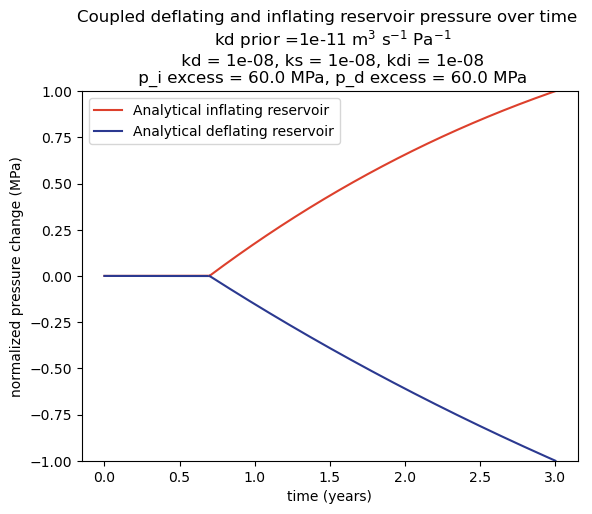

ODE solved.


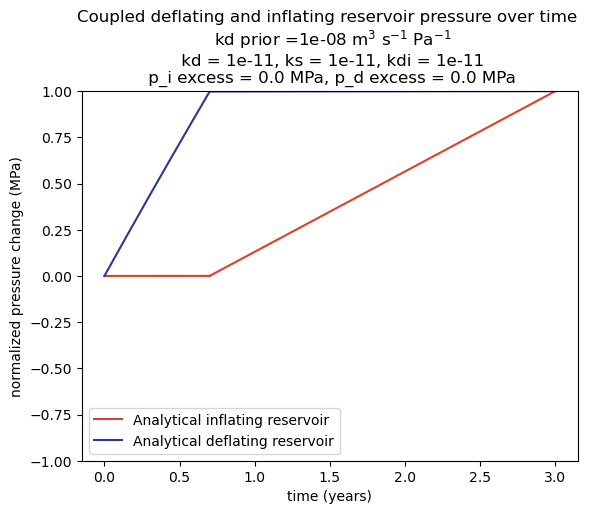

ODE solved.


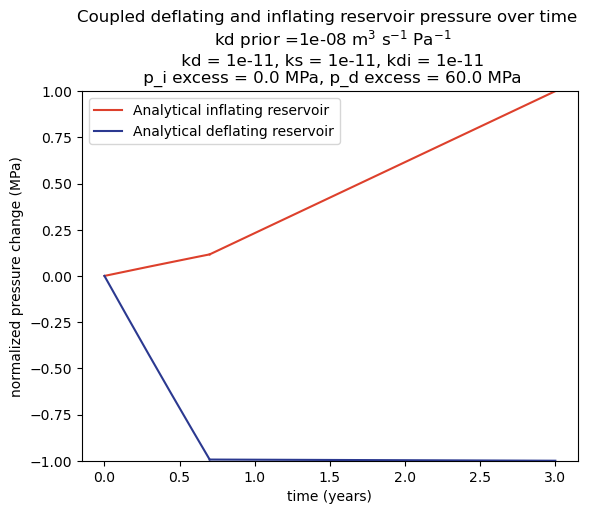

ODE solved.


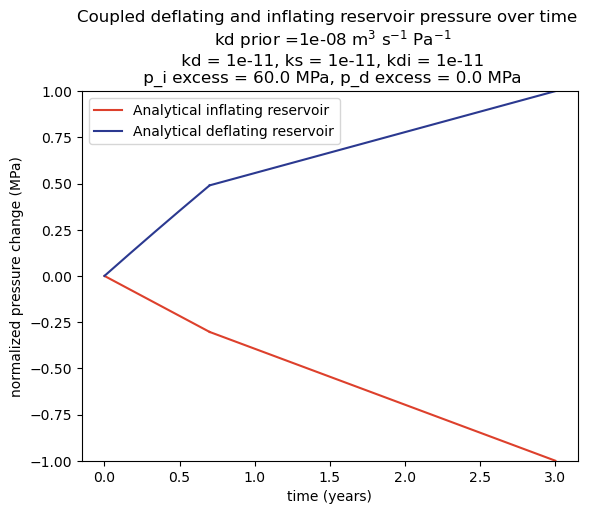

ODE solved.


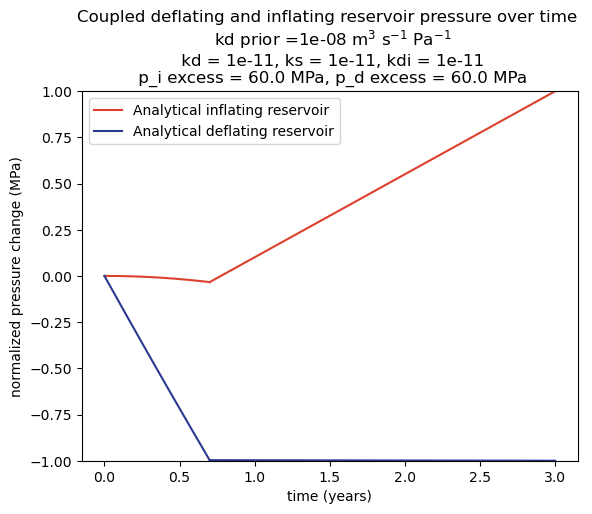

ODE solved.


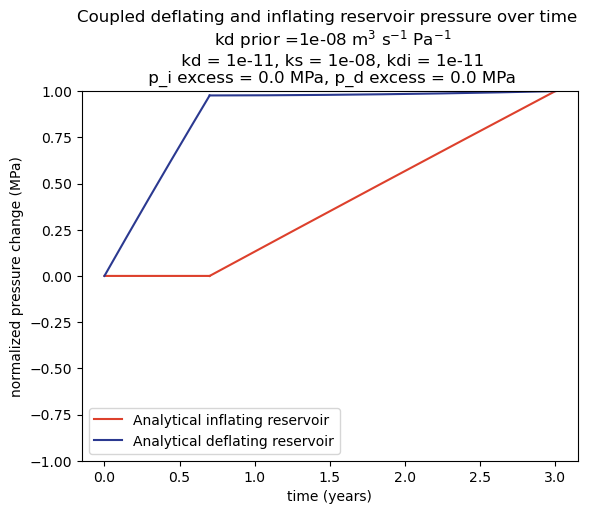

ODE solved.


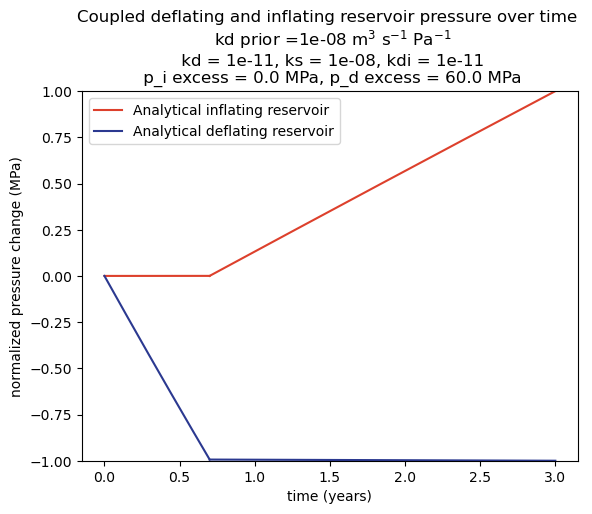

ODE solved.


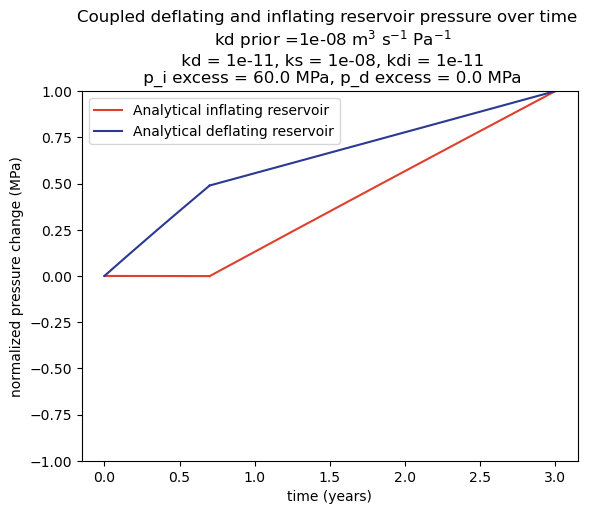

ODE solved.


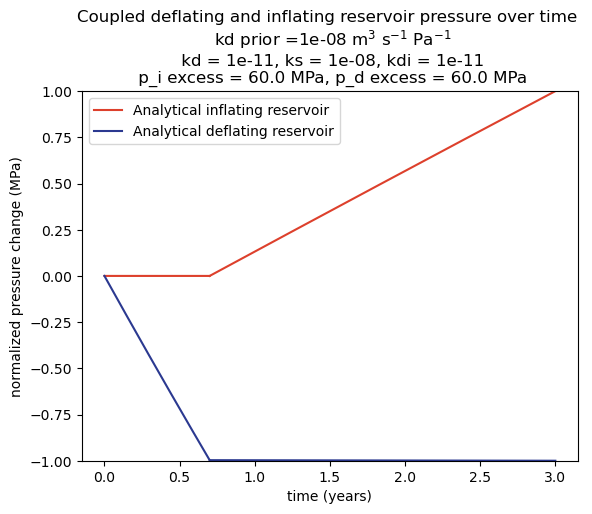

ODE solved.


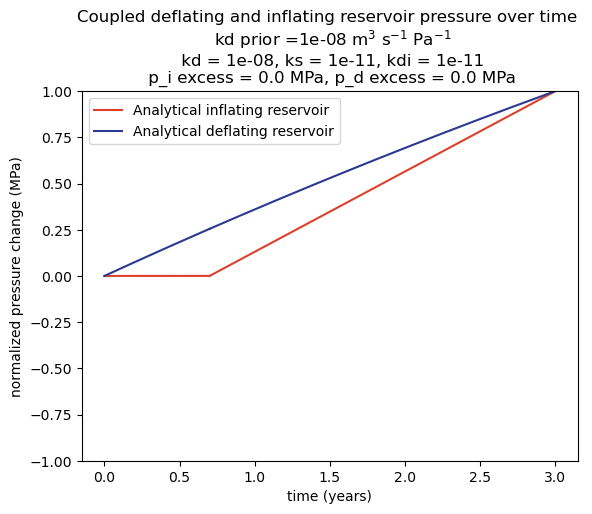

ODE solved.


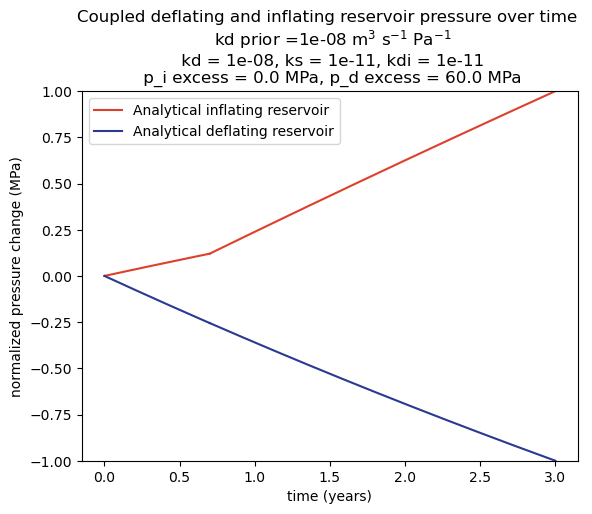

ODE solved.


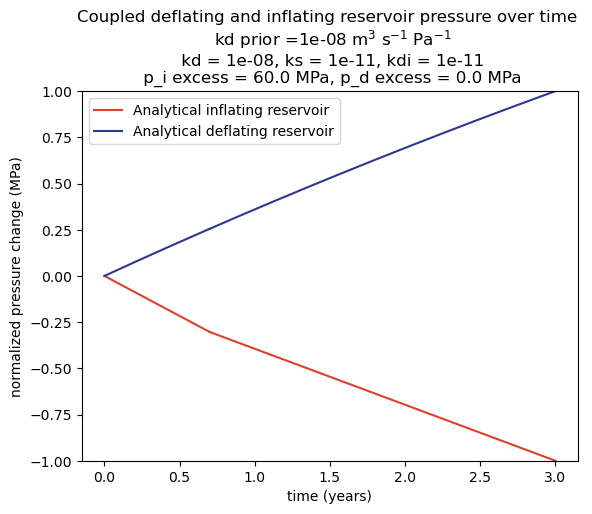

ODE solved.


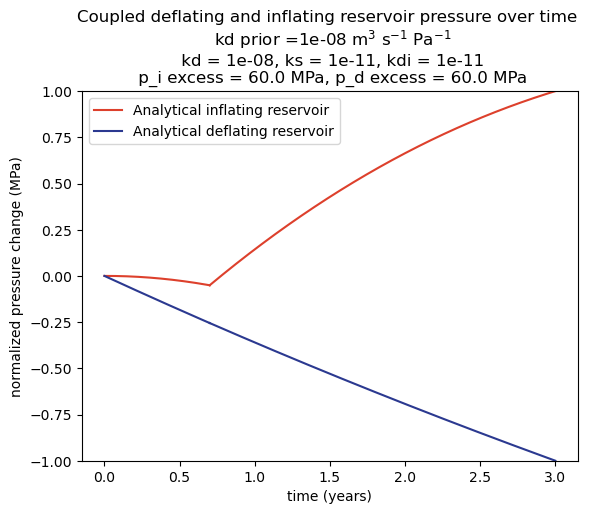

ODE solved.


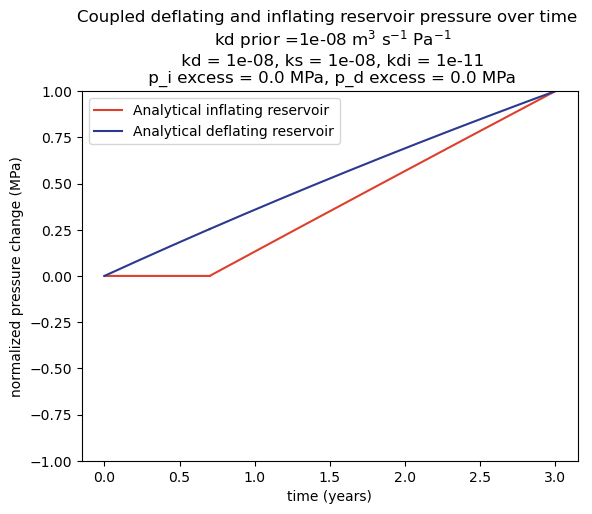

ODE solved.


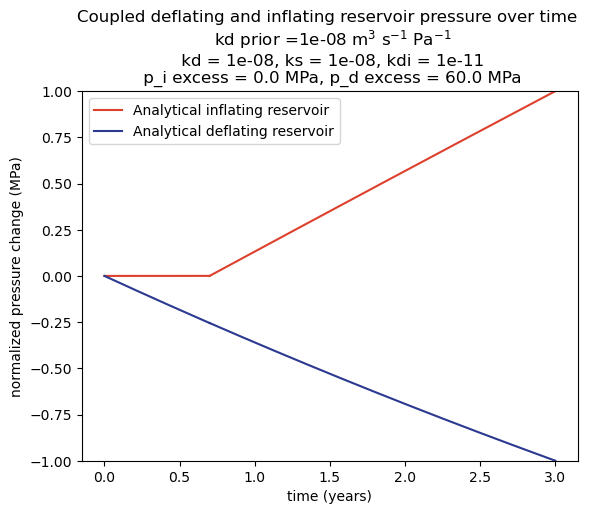

ODE solved.


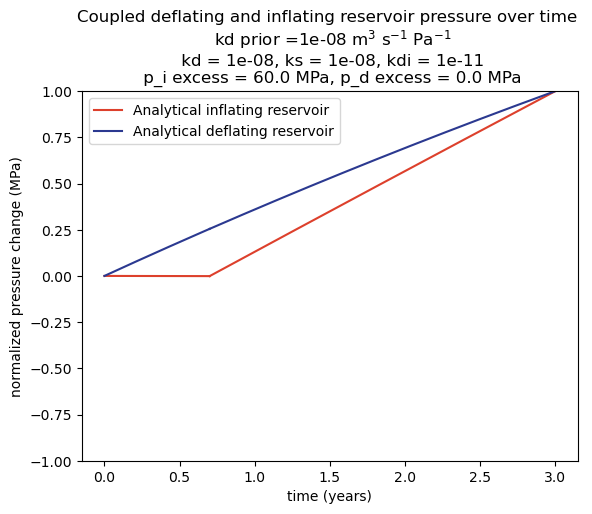

ODE solved.


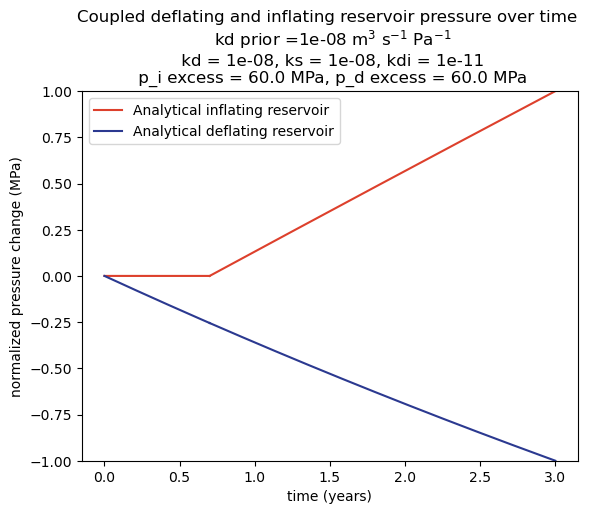

ODE solved.


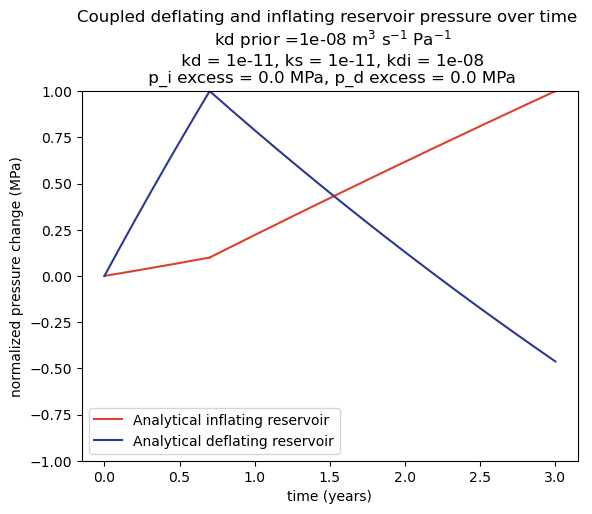

ODE solved.


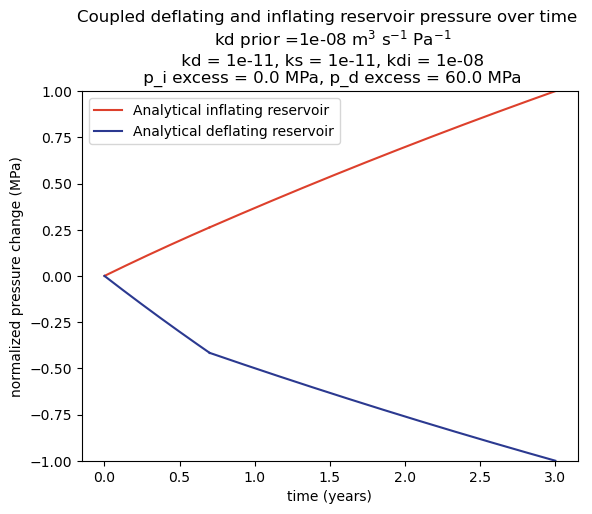

ODE solved.


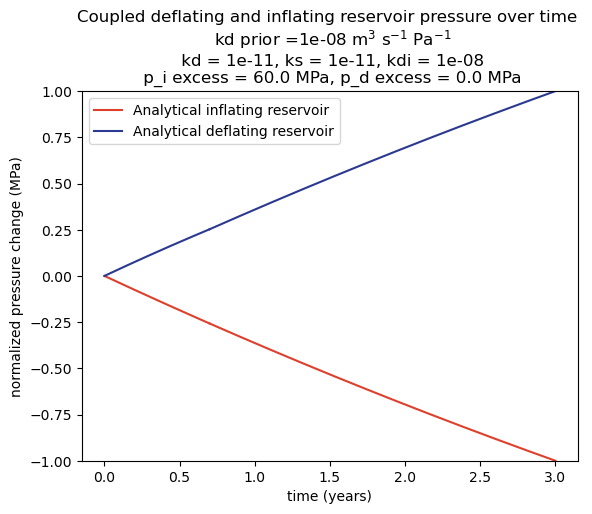

ODE solved.


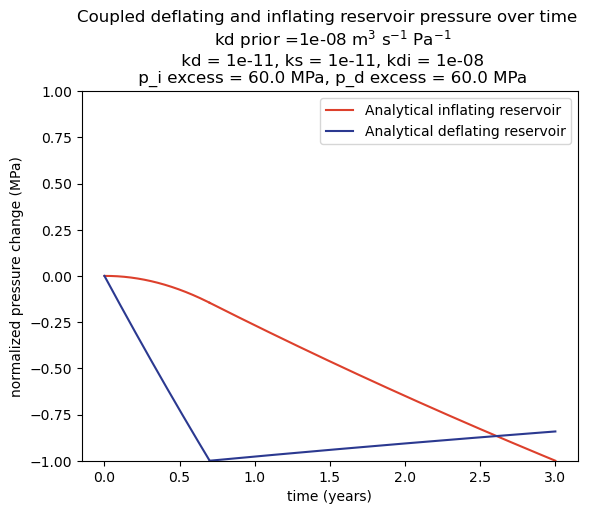

ODE solved.


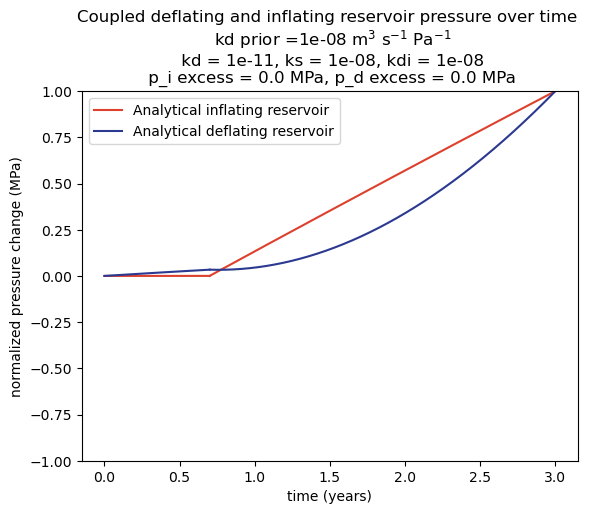

ODE solved.


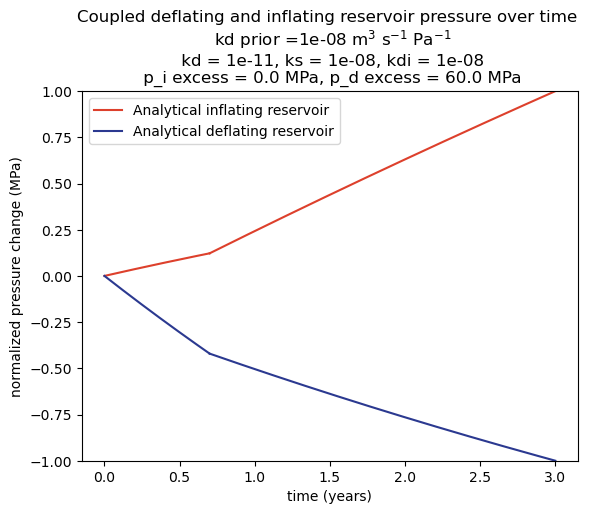

ODE solved.


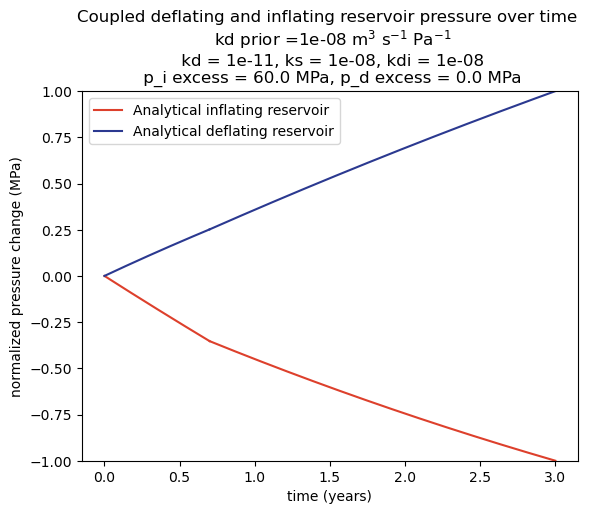

ODE solved.


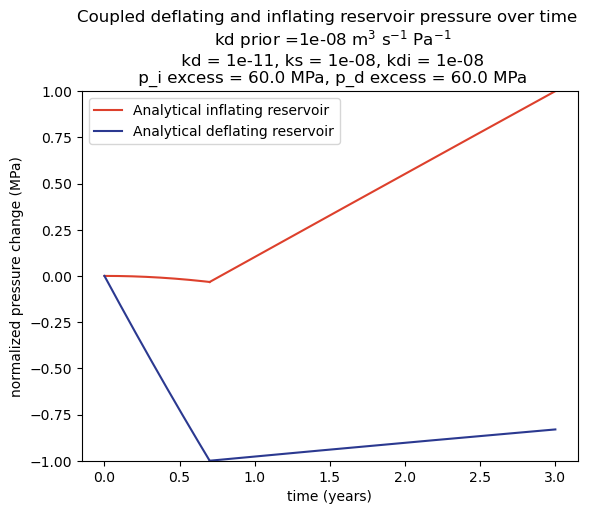

ODE solved.


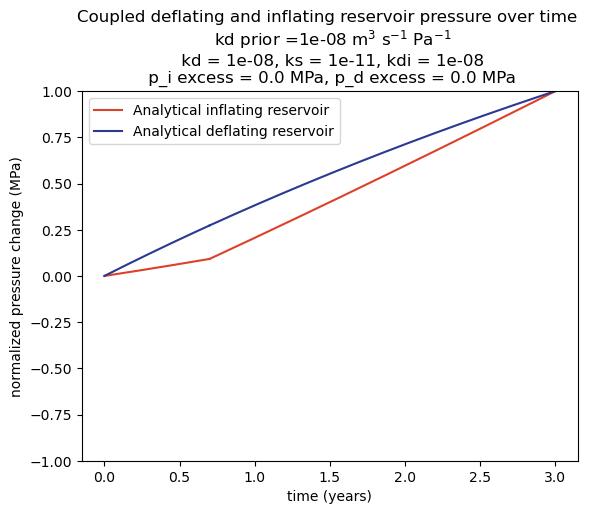

ODE solved.


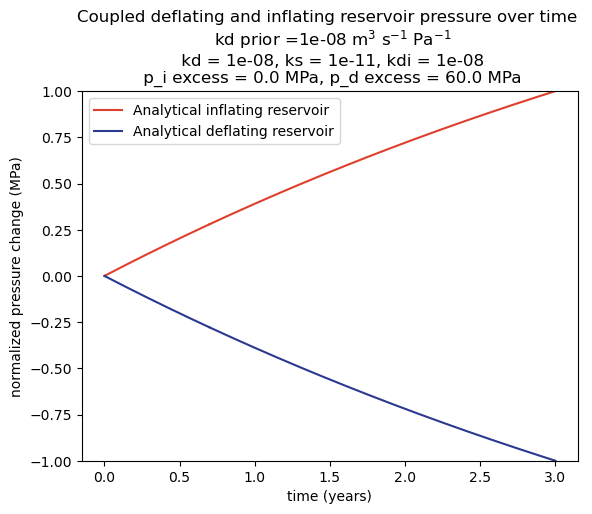

ODE solved.


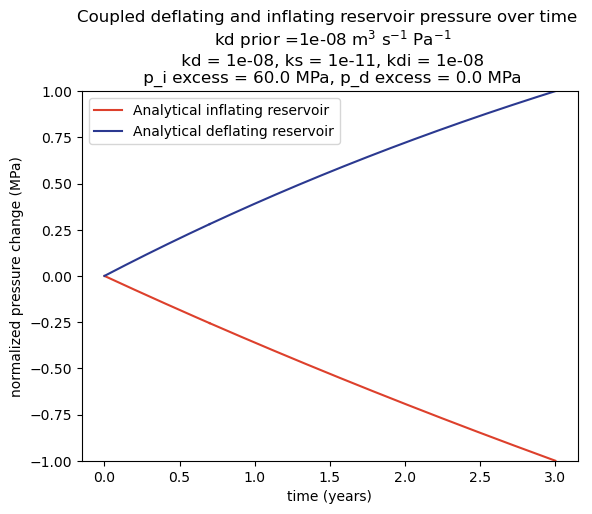

ODE solved.


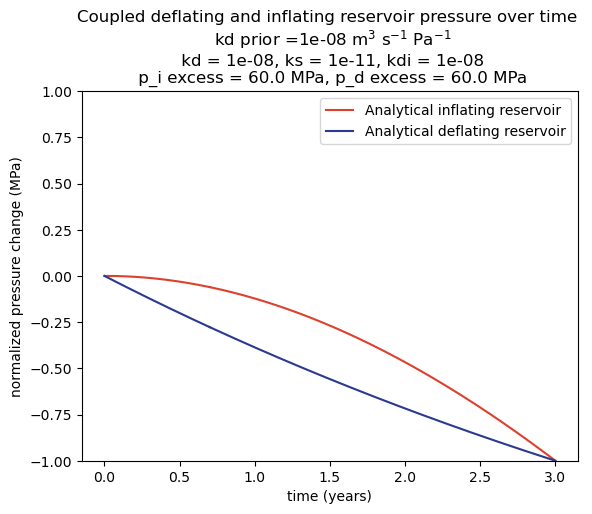

ODE solved.


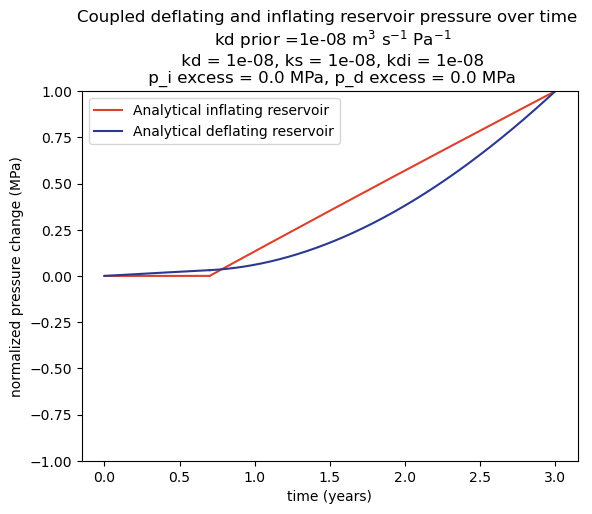

ODE solved.


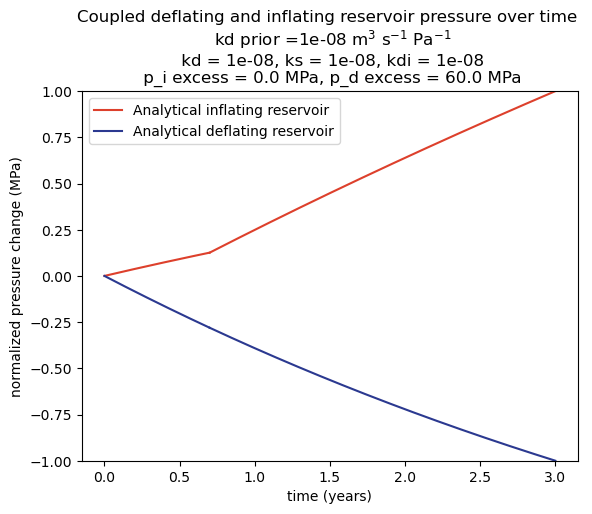

ODE solved.


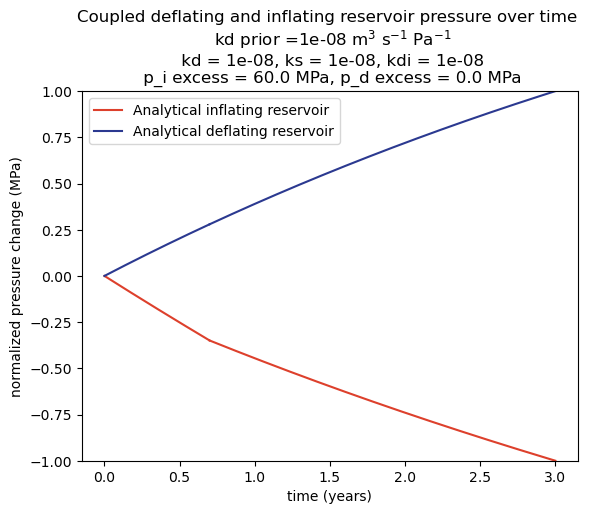

ODE solved.


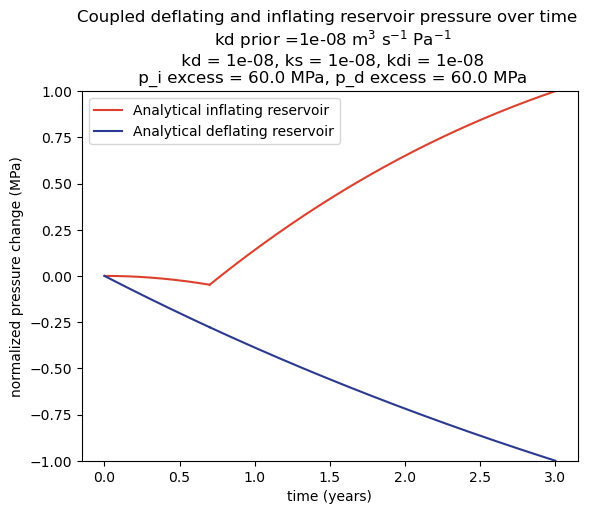

In [2]:
# pi1 = 172 MPa = lithostatic, centroid depth 6.5 km
# pd1 = 132 MPa = lithostatic, centroid depth 5 km

k_dp_array = np.asarray([1e-11, 1e-8])
k_di_array = np.asarray([1e-11, 1e-8])

k_d_array = np.asarray([1e-11, 1e-8])
k_s_array = np.asarray([1e-11, 1e-8])

excess_i = np.asarray([0., 60e6])
excess_d = np.asarray([0., 60e6])

pin_array = np.asarray([250e6])

for i in np.nditer(k_dp_array):
    for j in np.nditer(k_di_array):
        for k in np.nditer(k_d_array):
            for l in np.nditer(k_s_array):
                for m in np.nditer(excess_i):
                    for n in np.nditer(excess_d):
                        for p in np.nditer(pin_array):

                            # Initial variables

                            Vi = 32000000000. #m^3; Volume of inflating reservoir. 
                            Vd = 4000000000. #m^3; Volume of deflating reservoir.
                            Bi = 1e-9 #Pa^{-1}; Bulk compressibility of inflating reservoir.
                            Bd = 1e-9 # Pa^{-1}; Bulk compressibility of deflating reservoir.
                            rho = 2700. #kg/m^3; Magma/rock density.
                            g = 9.81 #m/s^2; gravitational acceleration. 
                            hd = 5000. #m; depth of deflating reservoir.
                            hi = 6500. #m; depth of inflating reservoir.
                            pin = p #Pa; pressure of deep source. 
                            
                            #-----------------

                            # solve the system dy/dt = f(y, t) where y = [pi, pd]

                            def f_di(y, t):
                                 pi = y[0]
                                 pd = y[1]

                                 # model equations (see Wang et al. 2021)

                                 f0 = (-1*kdi*(pi - rho*g*(hi-hd) - pd) + ks*(pin - pi))/(Vi*Bi)
                                 f1 = (-1*kd*(pd - rho*g*hd) + kdi*(pi - rho*g*(hi - hd) - pd))/(Vd*Bd)
                                 return [f0, f1]

                            # initial conditions for pi and pd based on depth of reservoir

                            p_init_d = [rho*9.8*hi + m, rho*9.8*hd + n]

                            # time until Sept. 2019

                            sec = 365.*24.*60.*60.
                            years = 0.7
                            time = np.arange(0, sec*years, 1)
                            
                            kdi = j # conduit conductivity between deflating and inflating reservoirs.
                            ks = 0. # conduit conductivity between deep source and inflating reservoir.
                            kd = i  # conduit conductivity between defalting reservoir and offshore.
                            kd_p = kd

                            # solve initial ODE until Sept. 2019

                            soln = odeint(f_di, p_init_d, time)
                            pi1 = soln[:, 0]
                            pd1 = soln[:, 1]

                            kdi = j # conduit conductivity between deflating and inflating reservoirs.
                            ks = l  # conduit conductivity between deep source and inflating reservoir.
                            kd = k  # conduit conductivity between defalting reservoir and offshore.

                            # time starting from Sept. 2019
                            # and initial condition constraining dPd(t_1)/dt = dPd(t_2)/dt

                            sec1 = 365.*24.*60.*60.
                            years1 = 2.3
                            time1 = np.arange(sec*years, (sec*years) + sec1*years1, 1)

                            # solve coupled ODEs with p1 = p_d(t_1)

                            p_d = 1e6
                            [p0, p1] = [pi1[-1], pd1[-1]]
                            p_init = [p0, p1]


                            soln1 = odeint(f_di, p_init, time1)
                            pi = soln1[:, 0]
                            pd = soln1[:, 1]

                            print("ODE solved.")
                            
                            plt.figure()
                            plt.plot(time[::501]/sec, (pi1[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C', label='Analytical inflating reservoir')
                            plt.plot(time[::501]/sec, (pd1[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990', label='Analytical deflating reservoir')
                            plt.plot(time1[::501]/sec1, (pi[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C')
                            plt.plot(time1[::501]/sec1, (pd[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990')
                            plt.ylim([-1,1])
                            plt.xlabel('time (years)')
                            plt.ylabel('normalized pressure change')
                            plt.legend()
                            plt.title('Coupled deflating and inflating reservoir pressure over time \n kd prior =' + str(kd_p) + ' m$^3$ s$^{-1}$ Pa$^{-1}$' + '\n kd = ' + str(kd) + ', ks = ' + str(ks) + ', kdi = ' + str(kdi) + '\n p_i excess = ' + str(m/1e6) + ' MPa, p_d excess = ' + str(n/1e6) + ' MPa') #! Do we want pressure change or pressure?
                            plt.show()


In [3]:
excess_i = 0.
excess_d = 60e6

Vi = 32000000000. #m^3; Volume of inflating reservoir. 
Vd = 4000000000. #m^3; Volume of deflating reservoir.
Bi = 1e-9 #Pa^{-1}; Bulk compressibility of inflating reservoir.
Bd = 1e-9 # Pa^{-1}; Bulk compressibility of deflating reservoir.
rho = 2700. #kg/m^3; Magma/rock density.
g = 9.81 #m/s^2; gravitational acceleration. 
hd = 5000. #m; depth of deflating reservoir.
hi = 6500. #m; depth of inflating reservoir.
pin = 250000000. #Pa; pressure of deep source. 

#-----------------

# solve the system dy/dt = f(y, t) where y = [pi, pd]

def f_di(y, t):
     pi = y[0]
     pd = y[1]

     # model equations (see Wang et al. 2021)

     f0 = (-1*kdi*(pi - rho*g*(hi-hd) - pd) + ks*(pin - pi))/(Vi*Bi)
     f1 = (-1*kd*(pd - rho*g*hd) + kdi*(pi - rho*g*(hi - hd) - pd))/(Vd*Bd)
     return [f0, f1]

# initial conditions for pi and pd based on depth of reservoir

p_init_d = [rho*9.8*hi + excess_i, rho*9.8*hd + excess_d]

# time until Sept. 2019

sec = 365.*24.*60.*60.
years = 0.7
time = np.arange(0, sec*years, 1)

kdi = 1e-11 # conduit conductivity between deflating and inflating reservoirs.
ks = 0. # conduit conductivity between deep source and inflating reservoir.
kd = 6e-7 # conduit conductivity between defalting reservoir and offshore.
kd_p = kd

# solve initial ODE until Sept. 2019

soln = odeint(f_di, p_init_d, time)
pi1 = soln[:, 0]
pd1 = soln[:, 1]

kdi = 1e-11 # conduit conductivity between deflating and inflating reservoirs.
ks = 1e-8 # conduit conductivity between deep source and inflating reservoir.
kd = 6e-7 # conduit conductivity between defalting reservoir and offshore.


# time starting from Sept. 2019
# and initial condition constraining dPd(t_1)/dt = dPd(t_2)/dt

sec1 = 365.*24.*60.*60.
years1 = 2.3
time1 = np.arange(sec*years, (sec*years) + sec1*years1, 1)

# solve coupled ODEs with p1 = p_d(t_1)

p_d = 1e6
[p0, p1] = [pi1[-1], pd1[-1]]
p_init = [p0, p1]


soln1 = odeint(f_di, p_init, time1)
pi = soln1[:, 0]
pd = soln1[:, 1]

print("ODE solved.")

ODE solved.


Plotting Figure 4b (inefficient connectivity).


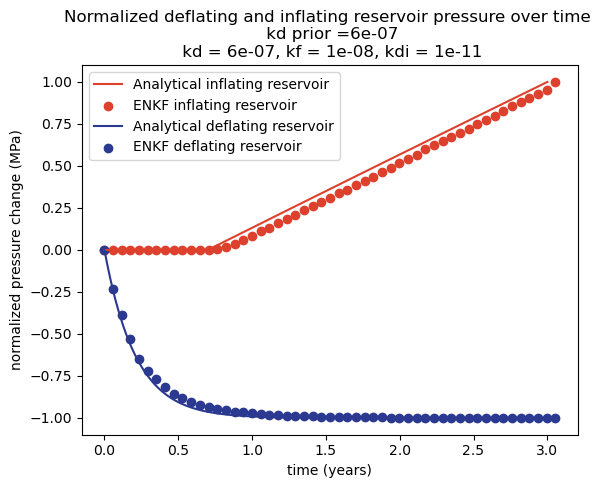

In [4]:
# load ENKF pressure change results

pres_i_enkf = np.loadtxt('Inflation_pres.txt')
pres_d_enkf = np.loadtxt('Deflation_pres.txt')

with open('Deflation_time.txt', 'r') as file:
    time_enkf = file.read().splitlines()

dates = [datetime.strptime(i, '%Y-%M-%dT00:00:00.000000000') for i in time_enkf]

total_sec = (dates[-1] - dates[0]).total_seconds()
time_enkf_f = np.linspace(0, total_sec, len(pres_i_enkf))

# plot results (figure 4b, inefficient connectivity)

plt.figure()
plt.plot(time[::501]/sec, (pi1[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C', label='Analytical inflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_i_enkf[::5]/np.max(pres_i_enkf[::5]), c='#DD402C', marker = 'o', label='ENKF inflating reservoir') #, label='inflating reservoir')
plt.plot(time[::501]/sec, (pd1[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990', label='Analytical deflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_d_enkf[::5]/np.max(abs(pres_d_enkf[::5])), c='#2B3990', marker = 'o', label='ENKF deflating reservoir') #, label='inflating reservoir')
plt.plot(time1[::501]/sec1, (pi[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C')
plt.plot(time1[::501]/sec1, (pd[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990')
plt.xlabel('time (years)')
plt.ylabel('normalized pressure change')
plt.legend()
plt.title('Normalized deflating and inflating reservoir pressure over time \n kd prior =' + str(kd_p) + '\n kd = ' + str(kd) + ', kf = ' + str(ks) + ', kdi = ' + str(kdi))

print("Plotting Figure 4b (inefficient connectivity).")

plt.savefig('analyticalTwoRes_inefficient_1.pdf')


In [5]:
kdi = 1e-11 # conduit conductivity between deflating and inflating reservoirs.
ks = 0. # conduit conductivity between deep source and inflating reservoir.
kd = 3e-7 # conduit conductivity between defalting reservoir and offshore.
kd_p = kd

# solve initial ODE until Sept. 2019
soln = odeint(f_di, p_init_d, time)
pi1 = soln[:, 0]
pd1 = soln[:, 1]

kdi = 1e-11 # conduit conductivity between deflating and inflating reservoirs.
ks = 1e-8 # conduit conductivity between deep source and inflating reservoir.
kd = 1e-11 # conduit conductivity between defalting reservoir and offshore.

# solve coupled ODEs with p1 = p_d(t_1)

p_d = 1e6
[p0, p1] = [pi1[-1], pd1[-1]]
p_init = [p0, p1]


soln1 = odeint(f_di, p_init, time1)
pi = soln1[:, 0]
pd = soln1[:, 1]

print("ODE solved.")

ODE solved.


Plotting Figure 4b (inefficient connectivity).


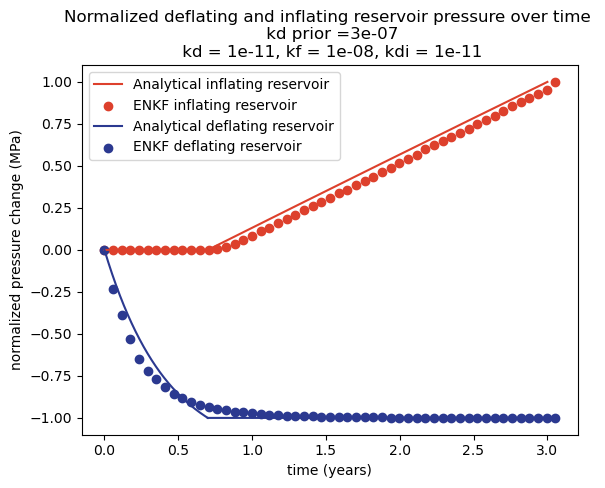

In [6]:
# plot results (figure 4b, inefficient connectivity)

plt.figure()
plt.plot(time[::501]/sec, (pi1[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C', label='Analytical inflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_i_enkf[::5]/np.max(pres_i_enkf[::5]), c='#DD402C', marker = 'o', label='ENKF inflating reservoir') #, label='inflating reservoir')
plt.plot(time[::501]/sec, (pd1[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990', label='Analytical deflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_d_enkf[::5]/np.max(abs(pres_d_enkf[::5])), c='#2B3990', marker = 'o', label='ENKF deflating reservoir') #, label='inflating reservoir')
plt.plot(time1[::501]/sec1, (pi[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C')
plt.plot(time1[::501]/sec1, (pd[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990')
plt.xlabel('time (years)')
plt.ylabel('normalized pressure change')
plt.legend()
plt.title('Normalized deflating and inflating reservoir pressure over time \n kd prior =' + str(kd_p) + '\n kd = ' + str(kd) + ', kf = ' + str(ks) + ', kdi = ' + str(kdi))

print("Plotting Figure 4b (inefficient connectivity).")

plt.savefig('analyticalTwoRes_inefficient_2.pdf')


In [7]:
kdi = 1e-8 # conduit conductivity between deflating and inflating reservoirs.
ks = 0. # conduit conductivity between deep source and inflating reservoir.
kd = 6e-7 # conduit conductivity between defalting reservoir and offshore.
kd_p = kd

# solve initial ODE until Sept. 2019
soln = odeint(f_di, p_init_d, time)
pi1 = soln[:, 0]
pd1 = soln[:, 1]

kdi = 1e-8 # conduit conductivity between deflating and inflating reservoirs.
ks = 1e-8 # conduit conductivity between deep source and inflating reservoir.
kd = 6e-7 # conduit conductivity between defalting reservoir and offshore.

# solve coupled ODEs with p1 = p_d(t_1)

p_d = 1e6
[p0, p1] = [pi1[-1], pd1[-1]]
p_init = [p0, p1]


soln1 = odeint(f_di, p_init, time1)
pi = soln1[:, 0]
pd = soln1[:, 1]

print("ODE solved.")

ODE solved.


Plotting Figure 4c (efficient connectivity).


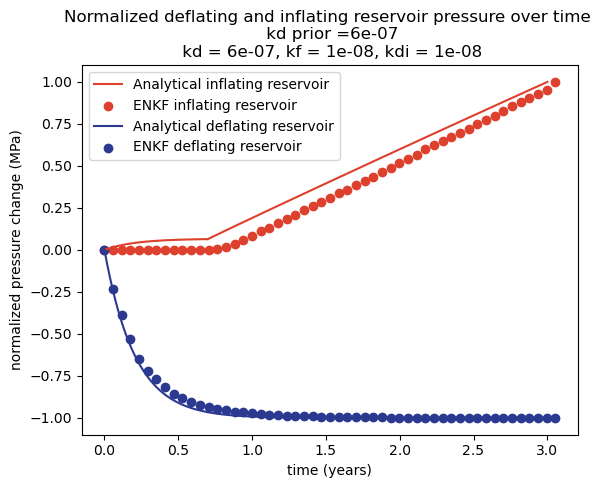

In [8]:
# plot results (figure 4c, efficient connectivity)

plt.figure()
plt.plot(time[::501]/sec, (pi1[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C', label='Analytical inflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_i_enkf[::5]/np.max(pres_i_enkf[::5]), c='#DD402C', marker = 'o', label='ENKF inflating reservoir') #, label='inflating reservoir')
plt.plot(time[::501]/sec, (pd1[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990', label='Analytical deflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_d_enkf[::5]/np.max(abs(pres_d_enkf[::5])), c='#2B3990', marker = 'o', label='ENKF deflating reservoir') #, label='inflating reservoir')
plt.plot(time1[::501]/sec1, (pi[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C')
plt.plot(time1[::501]/sec1, (pd[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990')
plt.xlabel('time (years)')
plt.ylabel('normalized pressure change')
plt.legend()
plt.title('Normalized deflating and inflating reservoir pressure over time \n kd prior =' + str(kd_p) + '\n kd = ' + str(kd) + ', kf = ' + str(ks) + ', kdi = ' + str(kdi))

print("Plotting Figure 4c (efficient connectivity).")

plt.savefig('analyticalTwoRes_efficient.pdf')


In [9]:
kdi = 1e-8 # conduit conductivity between deflating and inflating reservoirs.
ks = 0. # conduit conductivity between deep source and inflating reservoir.
kd = 3e-7 # conduit conductivity between defalting reservoir and offshore.
kd_p = kd

# solve initial ODE until Sept. 2019
soln = odeint(f_di, p_init_d, time)
pi1 = soln[:, 0]
pd1 = soln[:, 1]

kdi = 1e-8 # conduit conductivity between deflating and inflating reservoirs.
ks = 1e-8 # conduit conductivity between deep source and inflating reservoir.
kd = 1e-11 # conduit conductivity between defalting reservoir and offshore.

# solve coupled ODEs with p1 = p_d(t_1)

p_d = 1e6
[p0, p1] = [pi1[-1], pd1[-1]]
p_init = [p0, p1]

soln1 = odeint(f_di, p_init, time1)
pi = soln1[:, 0]
pd = soln1[:, 1]

print("ODE solved.")

ODE solved.


Plotting Figure 4c (efficient connectivity).


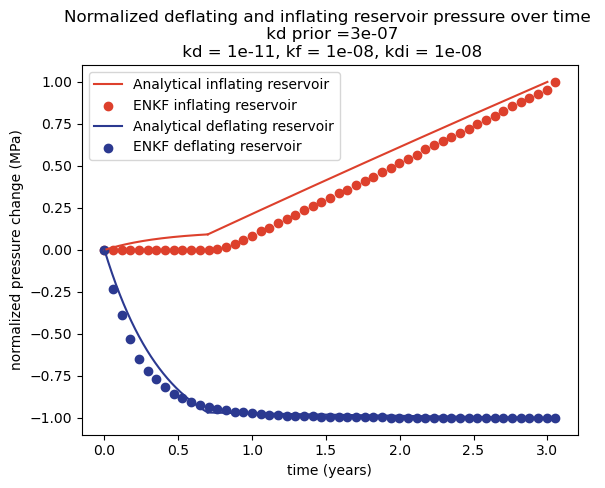

In [10]:
# plot results (figure 4c, efficient connectivity)

plt.figure()
plt.plot(time[::501]/sec, (pi1[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C', label='Analytical inflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_i_enkf[::5]/np.max(pres_i_enkf[::5]), c='#DD402C', marker = 'o', label='ENKF inflating reservoir') #, label='inflating reservoir')
plt.plot(time[::501]/sec, (pd1[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990', label='Analytical deflating reservoir')
plt.scatter(time_enkf_f[::5]/sec, pres_d_enkf[::5]/np.max(abs(pres_d_enkf[::5])), c='#2B3990', marker = 'o', label='ENKF deflating reservoir') #, label='inflating reservoir')
plt.plot(time1[::501]/sec1, (pi[::501]/1e6 - p_init_d[0]/1e6)/np.max([np.max(abs(pi[::501]/1e6 - p_init_d[0]/1e6)),np.max(abs(pi1[::501]/1e6 - p_init_d[0]/1e6))]), color='#DD402C')
plt.plot(time1[::501]/sec1, (pd[::501]/1e6 - p_init_d[1]/1e6)/np.max([np.max(abs(pd[::501]/1e6 - p_init_d[1]/1e6)),np.max(abs(pd1[::501]/1e6 - p_init_d[1]/1e6))]), color='#2B3990')
plt.xlabel('time (years)')
plt.ylabel('normalized pressure change')
plt.legend()
plt.title('Normalized deflating and inflating reservoir pressure over time \n kd prior =' + str(kd_p) + '\n kd = ' + str(kd) + ', kf = ' + str(ks) + ', kdi = ' + str(kdi))

print("Plotting Figure 4c (efficient connectivity).")

plt.savefig('analyticalTwoRes_efficient_2.pdf')
